# งานเพื่อวัดผลการเรียนรู้ของผู้เข้าอบรม (60 คะแนน)
Cat and Dog

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [1]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลของสุนัข และแมวตามคุณลักษณะ (Features) ประกอบด้วย
# หน้ากลม (face), หูตั้ง (ear), สีน้ำตาล (brown), แลบลิ้น (tongue), หนวดยาว (whisker)
data = pd.DataFrame({
    'face':[0, 0, 0, 1, 1, 0],                # หน้ากลม
    'ear':[1, 0, 0, 1, 1, 1],                 # หูตั้ง
    'brown':[1, 1, 1, 0, 1, 0],               # สีน้ำตาล
    'tongue':[1, 1, 0, 0, 0, 0],              # แลบลิ้น
    'whisker':[1, 0, 0, 1, 1, 1],             # หนวดยาว
    'target':['dog', 'dog', 'dog', 'cat', 'cat', 'cat'] # ค่าเป้าหมาย (target) หรือ คลาส (class) หรือ ฉลาก (label)
})

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,dog
1,0,0,1,1,0,dog
2,0,0,1,0,0,dog
3,1,1,0,0,1,cat
4,1,1,1,0,1,cat
5,0,1,0,0,1,cat


## แปลงรหัส (Encoding) ค่าเป้าหมาย (target) จากตัวอักษร 'cat' และ 'dog' ให้กลายเป็นตัวเลขแบบ Label (5 คะแนน)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target']=le.fit_transform(data['target'])
display(data)

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,1
1,0,0,1,1,0,1
2,0,0,1,0,0,1
3,1,1,0,0,1,0
4,1,1,1,0,1,0
5,0,1,0,0,1,0


## แปลงข้อมูลคุณลักษณะ (Features) ที่จัดเก็บใน DataFrame ให้อยู่ในรูป numpy.array 2 มิติ / และ numpy.array ของค่าเป้าหมาย ('target') (25 คะแนน)

In [8]:
X = data[['face', 'ear', 'brown', 'tongue', 'whisker']].values  # คุณลักษณะ (Features)
y = data['target'].values                                     # ค่าเป้าหมาย (target)

print("Features (X):")
print(X)
print("\nTarget (y):")
print(y)

Features (X):
[[0 1 1 1 1]
 [0 0 1 1 0]
 [0 0 1 0 0]
 [1 1 0 0 1]
 [1 1 1 0 1]
 [0 1 0 0 1]]

Target (y):
[1 1 1 0 0 0]


## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก แมว กับสุนัข (20 คะแนน)

In [9]:
# นำเข้า Library ของต้นไม้ที่ใช้ในการตัดสินใจ
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# สร้างแบบจำลองของต้นไม้ที่ใช้ในการตัดสินใจ (5 คะแนน)
model = DecisionTreeClassifier()

# ส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไป Train (10 คะแนน)
model.fit(X, y)

# ทดสอบความถูกต้องของแบบจำลอง โดยส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไปทดสอบ (5 คะแนน)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"ความแม่นยำของแบบจำลอง (Accuracy): {accuracy:.2f}")

ความแม่นยำของแบบจำลอง (Accuracy): 1.00


### แสดงต้นไม้ตัดสินใจ (Decision Tree) (10 คะแนน)

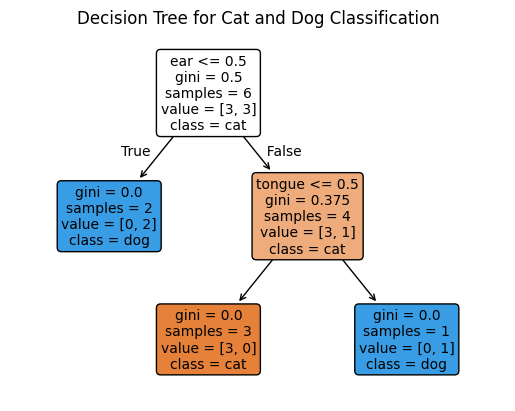

In [10]:
# นำเข้า Library สำหรับวาดต้นไม้
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# ส่งโมเดลให้กับ Library สำหรับวาดต้นไม้ (plot_tree) (5 คะแนน)
# ปรับแต่งกราฟที่ได้ให้สวยงาม
feature_names = ['face', 'ear', 'brown', 'tongue', 'whisker']
class_names = le.inverse_transform([0, 1]) # ดึงชื่อคลาสเดิมจาก LabelEncoder

plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree for Cat and Dog Classification")
plt.show()

In [12]:
# วาดต้นไม้ในลักษณะที่แสดงเป็นข้อความ (export_text) ที่คนทั่วไปสามารถเข้าใจได้ (5 คะแนน)
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=feature_names)
print(tree_rules)

|--- ear <= 0.50
|   |--- class: 1
|--- ear >  0.50
|   |--- tongue <= 0.50
|   |   |--- class: 0
|   |--- tongue >  0.50
|   |   |--- class: 1

